In [1]:
import matplotlib.pylab as plt
import cv2
import numpy as np
import math

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:955: UserWarning: Illegal line #1
	"TkAgg
"
	in file "/Users/macbook/.matplotlib/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)


In [2]:
def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [3]:
def findIntersection(l1, l2, height):
    [[x1,y1],[x2,y2]] = l1
    [[x3,y3],[x4,y4]] = l2
    d = ((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    if d == 0: return 0, height
    px = ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / d
    py = ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / d
    return [px, py]

(360, 480, 3)


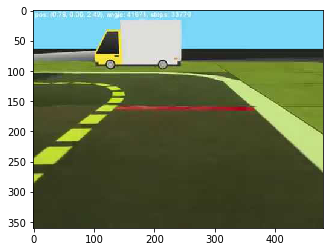

In [4]:
image = cv2.imread('0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
#image = image[int(height/2):,:]
plt.imshow(image)
plt.show()

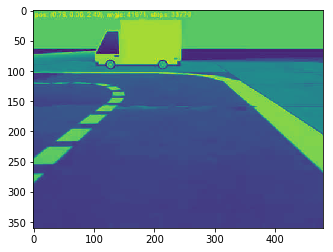

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)
plt.show()

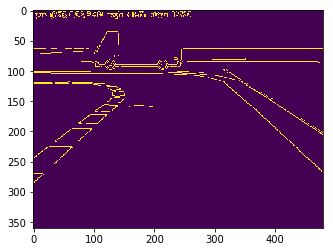

In [6]:
canny_image = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_image)
plt.show()

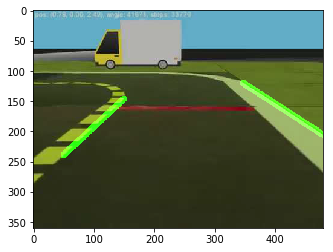

In [7]:
lines = cv2.HoughLinesP(canny_image[int(height/3):int(2*height/3),:],
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=100,
                        maxLineGap=20)
#array of (x_1, y_1, x_2, y_2)
lines = [[[l[0][0], l[0][1] + int(height/3), l[0][2], l[0][3] + int(height/3)]] for l in lines]
image_with_lines = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

In [8]:
lines = [[l[0][:2], l[0][2:]] for l in lines] #array of (x_1, y_1, x_2, y_2)
lines[:3]

[[[347, 120], [479, 205]], [[50, 239], [150, 146]]]

In [9]:
half_sorted_lines = [sorted(l, key = lambda x: x[1]) for l in lines] #sort poins in line: from top to bottom

In [10]:
sorted_lines = sorted(half_sorted_lines, key = lambda x: x[1][0]) #sort poins in lines: from left to right

In [11]:
l1, l2 = sorted_lines[0], sorted_lines[-1]
[[x1,y1],[x2,y2]] = l1
[[x3,y3],[x4,y4]] = l2
l = [[[x1,y1,x2,y2]], [[x3,y3,x4,y4]]]

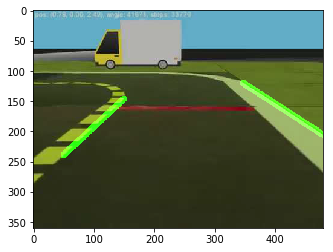

In [12]:
image_with_lines = drow_the_lines(image, l)
plt.imshow(image_with_lines)
plt.show()

In [13]:
x, y = findIntersection(sorted_lines[0], sorted_lines[-1], height)
target_angle = math.atanh((width/2 - x)/(height - y))

In [17]:
def find_angle(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 200)
    lines = cv2.HoughLinesP(canny_image[int(height/3):int(2*height/3),:],
                            rho=6,
                            theta=np.pi/180,
                            threshold=160,
                            lines=np.array([]),
                            minLineLength=100,
                            maxLineGap=20)
    #array of (x_1, y_1, x_2, y_2)
    lines = [[[l[0][0], l[0][1] + int(height/3), l[0][2], l[0][3] + int(height/3)]] for l in lines]
    lines = [[l[0][:2], l[0][2:]] for l in lines] #array of (x_1, y_1, x_2, y_2)
    half_sorted_lines = [sorted(l, key = lambda x: x[1]) for l in lines] #sort poins in line: from top to bottom
    sorted_lines = sorted(half_sorted_lines, key = lambda x: x[1][0]) #sort poins in lines: from left to right
    l1, l2 = sorted_lines[0], sorted_lines[-1]
    [[x1,y1],[x2,y2]] = l1
    [[x3,y3],[x4,y4]] = l2
    l = [[[x1,y1,x2,y2]], [[x3,y3,x4,y4]]]
    image_with_lines = drow_the_lines(image, l)
    x, y = findIntersection(sorted_lines[0], sorted_lines[-1], height)
    return math.atanh((width/2 - x)/(height - y))

In [18]:
image = cv2.imread('0.jpg')
find_angle(image)

-0.023390491060879728